In [184]:
import numpy as np
import os
from matplotlib import pyplot as plt

In [166]:
import shutil

def createIfNotExist(path):
    isExist = os.path.exists(path)
    if not isExist:
      os.makedirs(path)
      print(f"The new directory {path} is created!")

In [168]:
from PIL import Image
import os


def preprocess_image(input_path, output_path, shape=512, pref=''):
    output_name = pref
    paths_to_images = []
    image = Image.open(input_path)
    image = image.resize((shape, shape))
    image.save(output_path)
    paths_to_images.append(output_path + output_name + ".jpg")
    return paths_to_images


def preprocess_all_images_int_file_tree(input_path, output_path):
    for root, dirs, files in os.walk(input_path):
        for dir_name in dirs:
            if not os.path.exists(os.path.join(output_path, dir_name)):
                os.mkdir(os.path.join(output_path, dir_name))
        for file in os.listdir(root):
            if os.path.join(root, file).split('.')[-1] != 'jpg':
                break
            curr_out_path = os.path.join(os.path.join(output_path + root.split('/')[-1]),file)
            preprocess_image(os.path.join(root, file), curr_out_path)


input_dataset_path = "indoor/"
output_dataset_path = "indoor_processed/"

createIfNotExist(output_dataset_path)

preprocess_all_images_int_file_tree(input_dataset_path, output_dataset_path)

In [169]:
data_path = "indoor_SiriusPlace[NotSplitted]"

In [208]:
folders = [name for name in os.listdir("indoor_processed") if os.path.isdir(os.path.join(os.getcwd(), data_path, name))]
folders

['Coworking',
 'Двери в туалет',
 'Проход к столовой',
 'Вход в арену',
 'Nagano',
 'Лестница у входа',
 'Спортивный комплекс внутри арены',
 'Cafeteria',
 'Sochi',
 'Лестница около коворкинга']

In [209]:
train_prob = 0.2
random_state = 42 
np.random.seed(random_state)

train = []
test = []
all_data = []

for folder in folders:
    files = os.listdir(os.path.join(os.getcwd(), data_path, folder))
    if '.DS_Store' in files:
        files.remove('.DS_Store')
    np.random.shuffle(files)
    ind = int(len(files) * train_prob)
    train.append((files[:ind], folder))
    test.append((files[ind:], folder))
    all_data.append((files, folder))

In [210]:
result_folder = "airi_dataset"

In [211]:
import json

num_to_class = {i:name for i, name in enumerate(folders)}
num_to_class

with open(f"{result_folder}/num_to_class.json", "w") as fout:
    json.dump(num_to_class, fout)

In [215]:
createIfNotExist(result_folder)

def process_subset(files, subset_name):
    for files_arr, folder in files:
        curDir = os.path.join(os.getcwd(), result_folder, subset_name, folder)
        createIfNotExist(curDir)
        for file in files_arr:
            srcFile = os.path.join(os.getcwd(), data_path, folder, file)
            print(srcFile)
            dstFile = os.path.join(os.getcwd(), result_folder, subset_name, folder, file)
            shutil.copyfile(srcFile, dstFile)

In [216]:
process_subset(train, 'train')
process_subset(test, 'test')

/Users/garipovroma/work/airi-school/netvlad-approach/dataset/indoor_SiriusPlace[NotSplitted]/Coworking/IMG_20220706_184222.jpg
/Users/garipovroma/work/airi-school/netvlad-approach/dataset/indoor_SiriusPlace[NotSplitted]/Coworking/IMG_20220706_184241(1).jpg
/Users/garipovroma/work/airi-school/netvlad-approach/dataset/indoor_SiriusPlace[NotSplitted]/Coworking/IMG_20220706_184215.jpg
/Users/garipovroma/work/airi-school/netvlad-approach/dataset/indoor_SiriusPlace[NotSplitted]/Coworking/IMG_20220706_184148.jpg
/Users/garipovroma/work/airi-school/netvlad-approach/dataset/indoor_SiriusPlace[NotSplitted]/Coworking/IMG_20220706_184155.jpg
/Users/garipovroma/work/airi-school/netvlad-approach/dataset/indoor_SiriusPlace[NotSplitted]/Coworking/IMG_20220706_184245.jpg
/Users/garipovroma/work/airi-school/netvlad-approach/dataset/indoor_SiriusPlace[NotSplitted]/Coworking/IMG_20220706_184251.jpg
/Users/garipovroma/work/airi-school/netvlad-approach/dataset/indoor_SiriusPlace[NotSplitted]/Coworking/IMG_2

In [220]:
class_count = [len(samples) for (samples, class_name) in all_data]
classes = [class_name for (samples, class_name) in all_data]
class_count

[49, 12, 55, 70, 82, 26, 10, 10, 78, 29]

<BarContainer object of 10 artists>

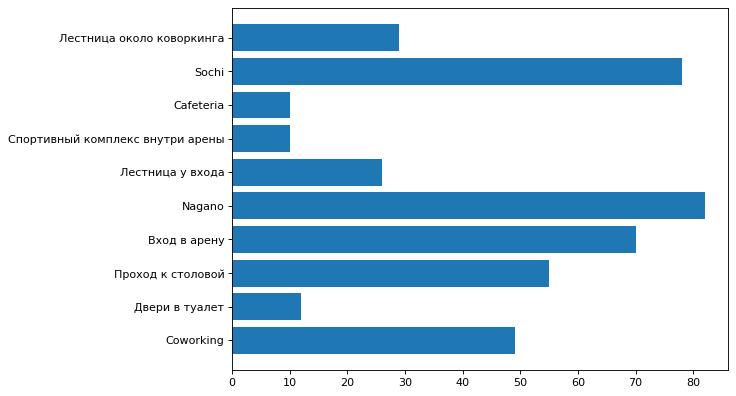

In [223]:
plt.figure(figsize=(8, 6), dpi=80)
plt.barh(classes, width=class_count)